In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")
print("Libraries Loaded Successfully")


Libraries Loaded Successfully


In [147]:
df = pd.read_csv("diabetes.csv")
print("Shape:", df.shape)

Shape: (768, 9)


In [148]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [149]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [151]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

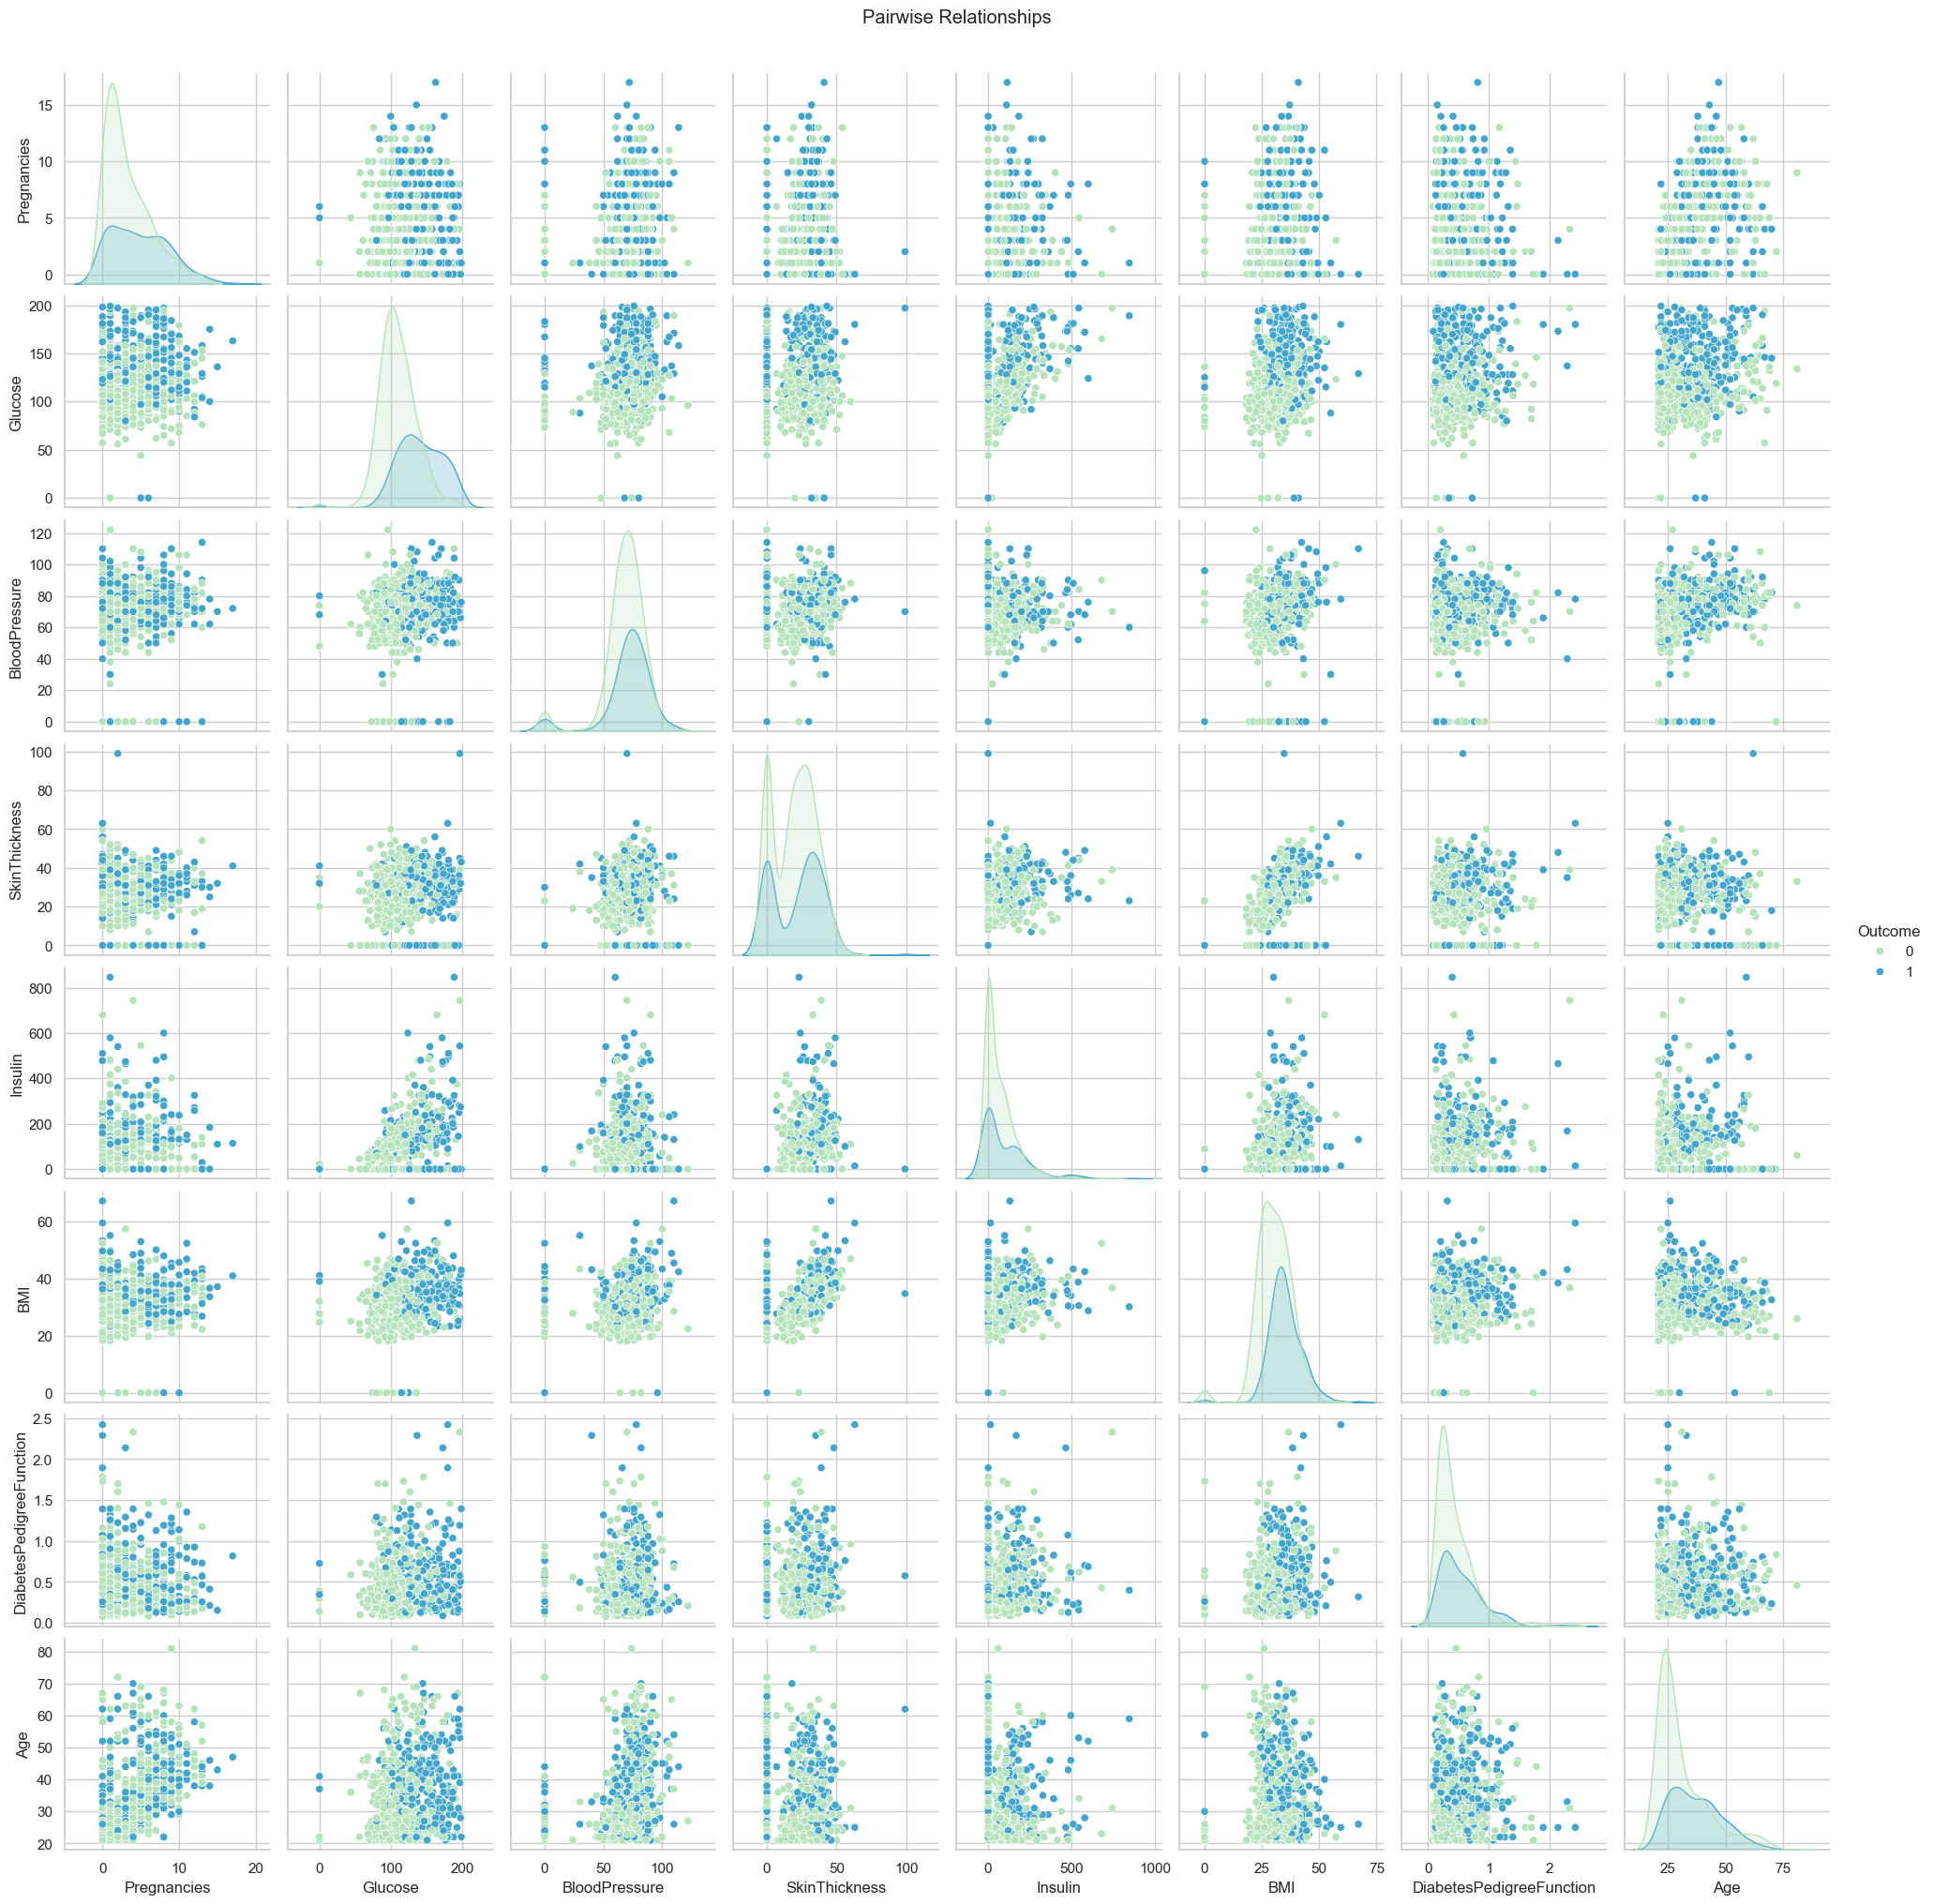

In [152]:

sns.pairplot(df, hue="Outcome", palette="GnBu")
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


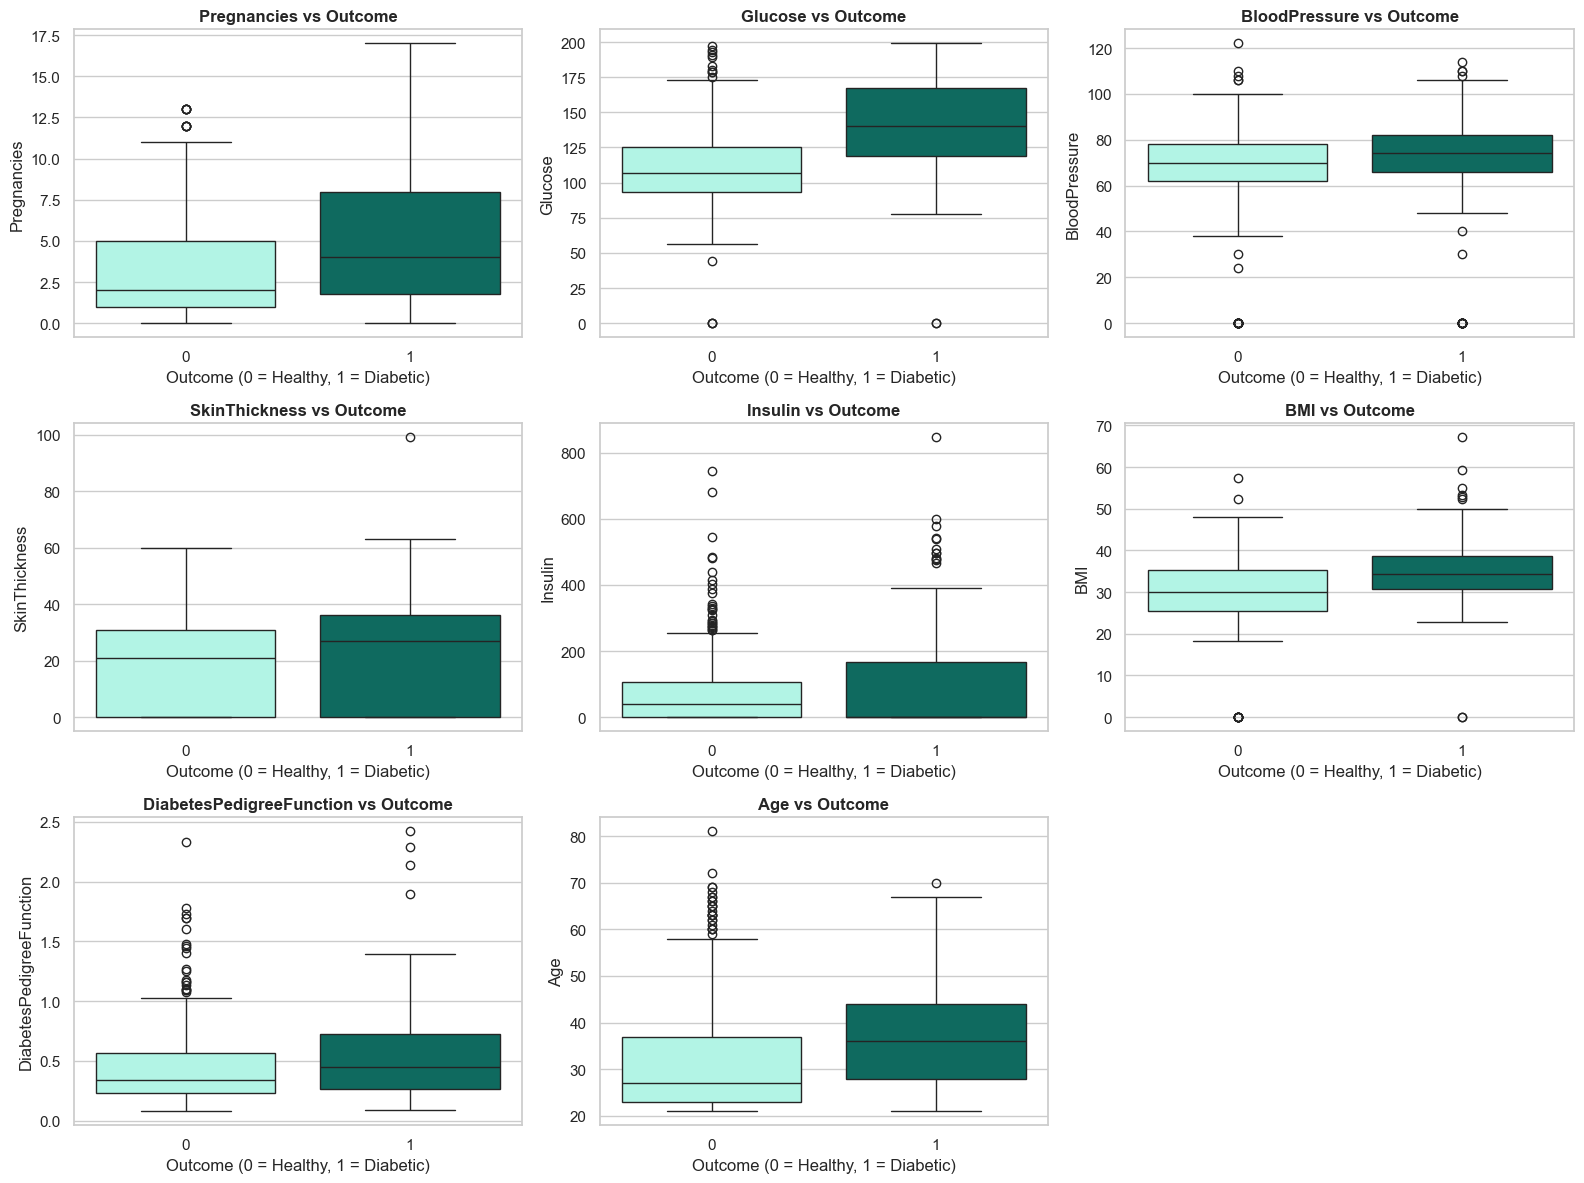

In [153]:
#BoxPlot
palette = ["#A7FFEB", "#00796B"]

features = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
            "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

plt.figure(figsize=(16, 12))

for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x="Outcome", y=col, data=df, palette=palette)
    plt.title(f"{col} vs Outcome", fontsize=12, fontweight="bold")
    plt.xlabel("Outcome (0 = Healthy, 1 = Diabetic)")
    plt.ylabel(col)

plt.tight_layout()
plt.show()



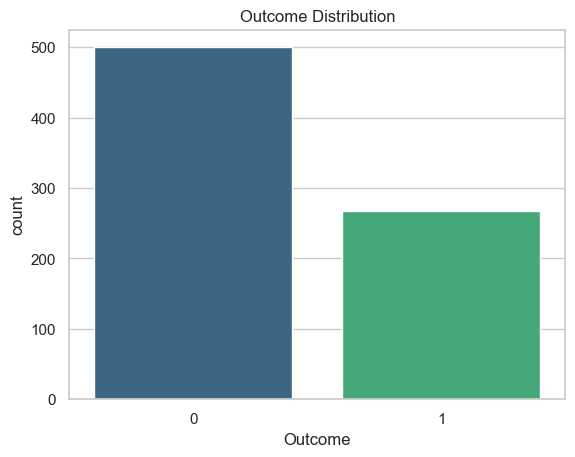

In [154]:
# Distribution of Target Class
sns.countplot(x='Outcome', data=df, palette="viridis")
plt.title("Outcome Distribution")
plt.show()

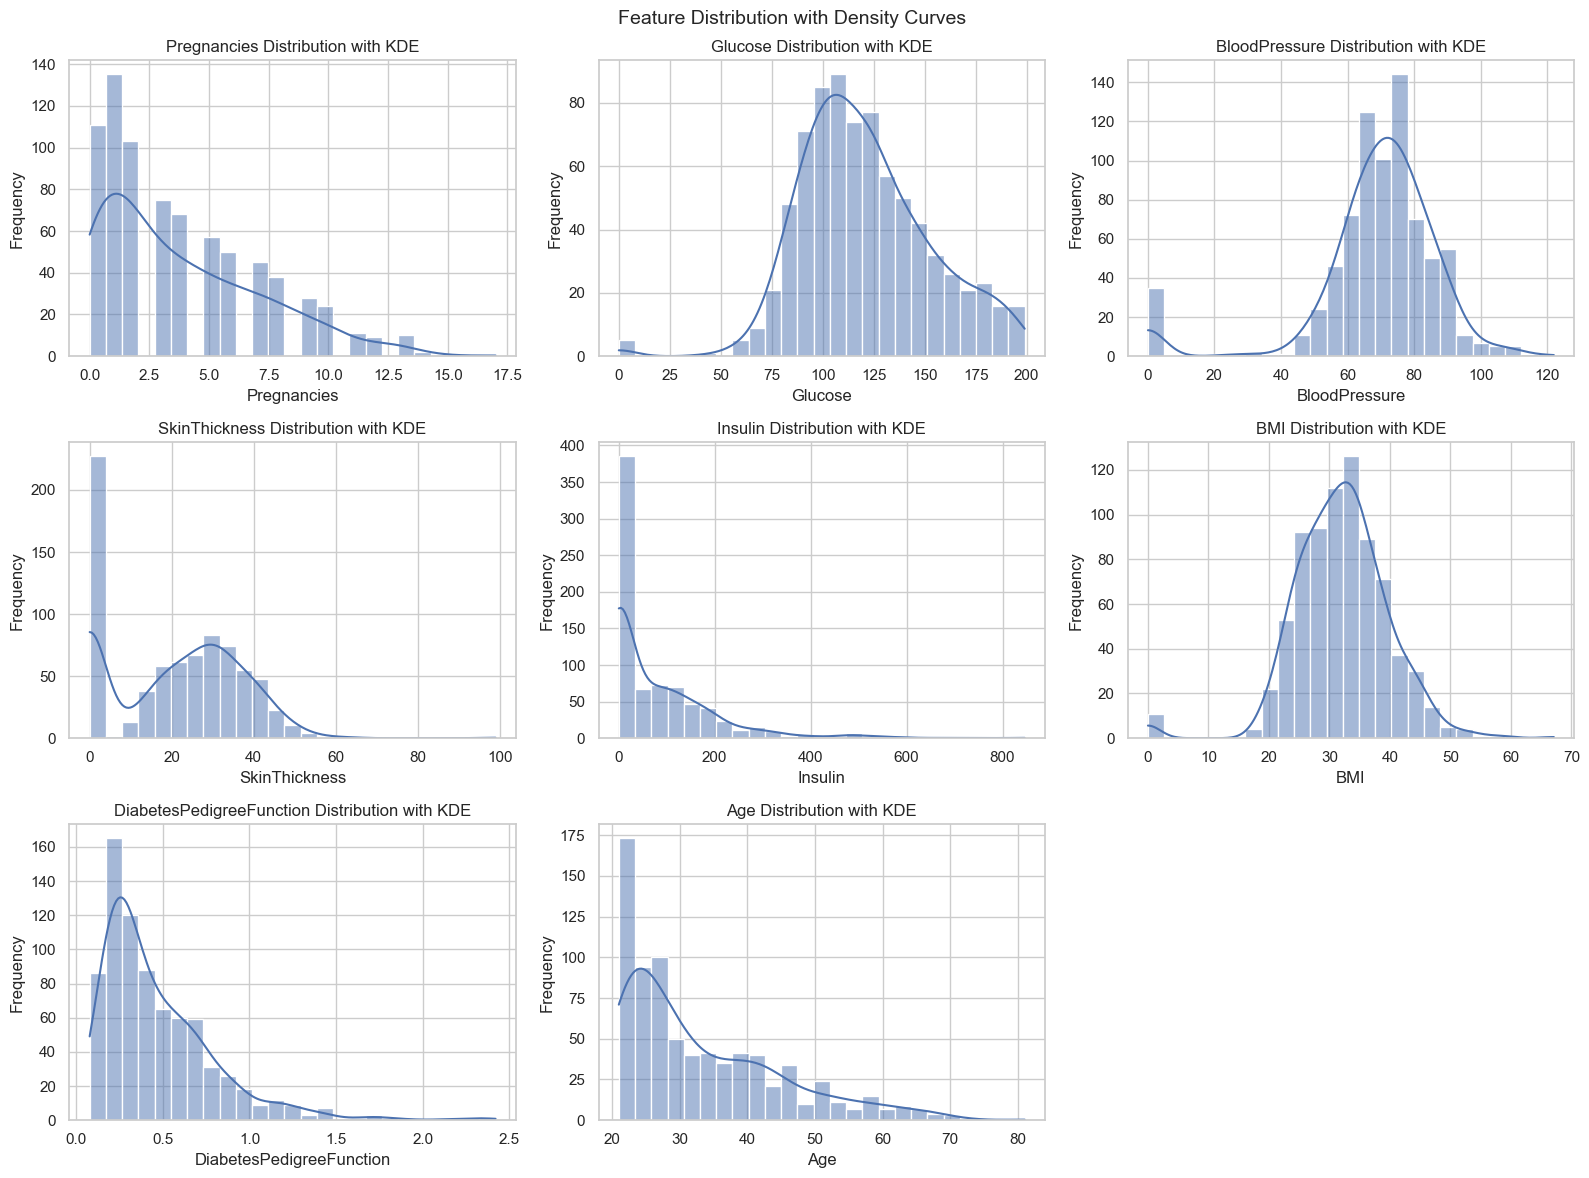

In [155]:
# Histograms of All Features
num_cols = df.columns[:-1]  # exclude Outcome

plt.figure(figsize=(16,12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3,3,i)
    sns.histplot(df[col], bins=25, kde=True)   #  ← KDE added here
    plt.title(f"{col} Distribution with KDE")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.suptitle("Feature Distribution with Density Curves", fontsize=14)
plt.tight_layout()
plt.show()

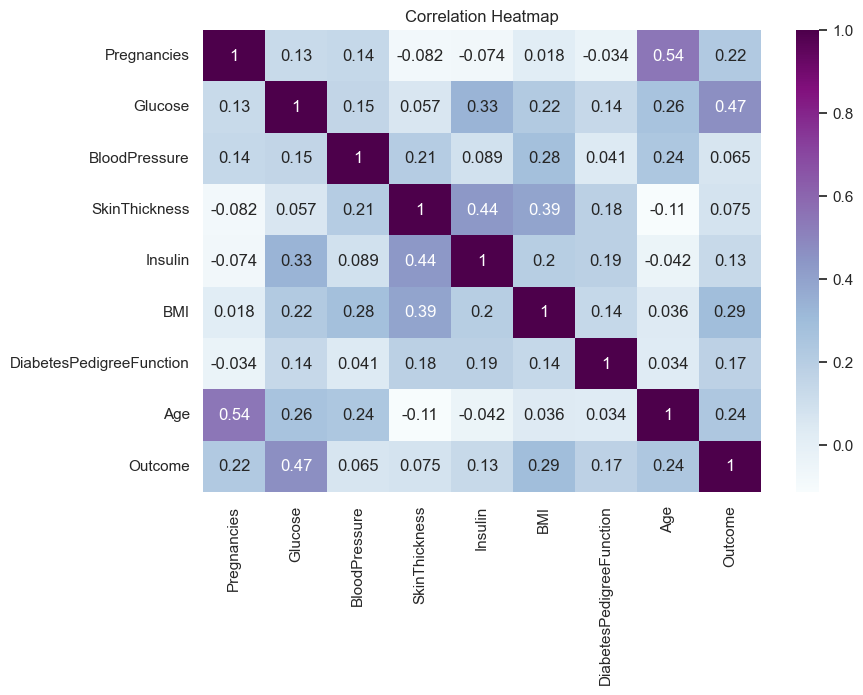

In [156]:
# Correlation Heatmap
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(), annot=True, cmap='BuPu')
plt.title("Correlation Heatmap")
plt.show()

In [157]:
cols_zero = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]

for col in cols_zero:
    df[col] = df[col].replace(0, np.nan)

print("Missing values before filling:\n", df.isnull().sum())
df.fillna(df.median(), inplace=True)
print("\nMissing values after filling:\n", df.isnull().sum())



Missing values before filling:
 Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Missing values after filling:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


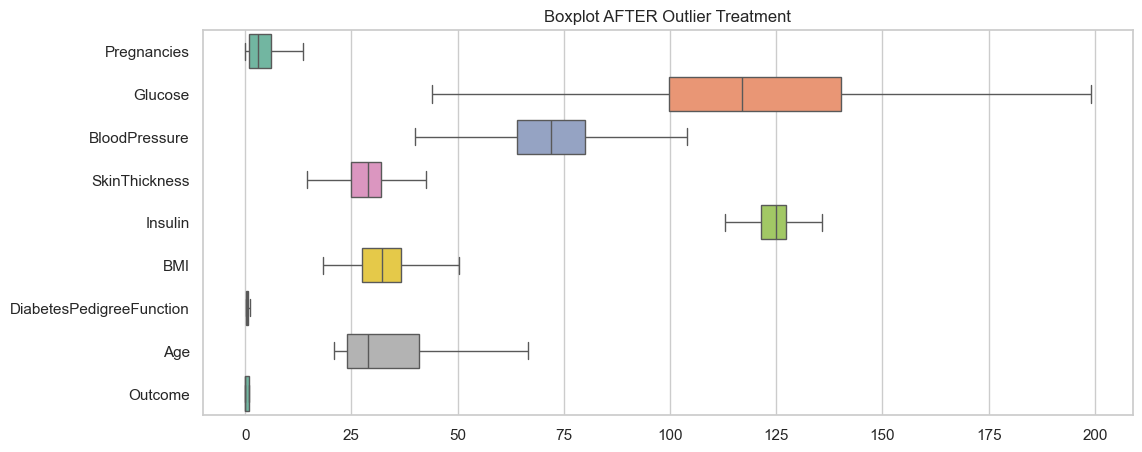

In [167]:
df2 = df.copy()
for col in df2.columns:
    if col!="Outcome":
        Q1,Q3 = df2[col].quantile([0.25,0.75])
        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR
        df2[col] = np.clip(df2[col], lower, upper)

# Boxplot AFTER treatment
plt.figure(figsize=(12,5))
sns.boxplot(data=df2, orient='h', palette="Set2")
plt.title("Boxplot AFTER Outlier Treatment")
plt.show()


In [159]:
df3 = df2[["Pregnancies","Glucose","BMI","Age","Outcome"]]
print("Final Columns:", df3.columns.to_list())
df3.head()


Final Columns: ['Pregnancies', 'Glucose', 'BMI', 'Age', 'Outcome']


,Pregnancies,Glucose,BMI,Age,Outcome
0,6.0,148.0,33.6,50.0,1
1,1.0,85.0,26.6,31.0,0
2,8.0,183.0,23.3,32.0,1
3,1.0,89.0,28.1,21.0,0
4,0.0,137.0,43.1,33.0,1


In [168]:
#Feature Engineering

df3['BMI_Glucose_Ratio'] = df3['BMI'] / df3['Glucose']
df3['Age_BMI'] = df3['Age'] * df3['BMI']
df3['Pregnancy_Age_Ratio'] = df3['Pregnancies'] / (df3['Age']+1)
df3['Risk_Score'] = (df3['BMI'] + df3['Glucose'] + df3['Age'])/3

df3.head()


,Pregnancies,Glucose,BMI,Age,Outcome,BMI_Glucose_Ratio,Age_BMI,Pregnancy_Age_Ratio,Risk_Score
0,6.0,148.0,33.6,50.0,1,0.227027,1680.0,0.117647,77.200000
1,1.0,85.0,26.6,31.0,0,0.312941,824.6,0.031250,47.533333
2,8.0,183.0,23.3,32.0,1,0.127322,745.6,0.242424,79.433333
3,1.0,89.0,28.1,21.0,0,0.315730,590.1,0.045455,46.033333
4,0.0,137.0,43.1,33.0,1,0.314599,1422.3,0.000000,71.033333


In [169]:
X = df3.drop("Outcome", axis=1)
y = df3["Outcome"]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Class balancing with SMOTE
print("Before SMOTE:\n", y.value_counts())
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)
print("\nAfter SMOTE:\n", y_res.value_counts())

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res,
    test_size=0.2,
    stratify=y_res,
    random_state=42
)

print("\nTrain shape:", X_train.shape, "Test shape:", X_test.shape)



Before SMOTE:
 Outcome
0    500
1    268
Name: count, dtype: int64

After SMOTE:
 Outcome
1    500
0    500
Name: count, dtype: int64

Train shape: (800, 8) Test shape: (200, 8)


In [170]:
# Base models (untuned)
base_models = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True, class_weight="balanced", random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=2000, class_weight="balanced"),
    "Decision Tree": DecisionTreeClassifier(class_weight="balanced", random_state=42),
}

# Models to tune with GridSearch
param_grids = {
    "Random Forest": (
        RandomForestClassifier(random_state=42),
        {
            "n_estimators": [200, 400, 600],
            "max_depth": [6, 8, 10, None],
            "min_samples_split": [2, 5, 10]
        }
    ),
    "XGBoost": (
        XGBClassifier(eval_metric="logloss", random_state=42),
        {
            "n_estimators": [200, 300, 500],
            "learning_rate": [0.01, 0.05, 0.1],
            "max_depth": [3, 5, 7]
        }
    ),
    "LightGBM": (
        LGBMClassifier(class_weight="balanced", random_state=42),
        {
            "n_estimators": [200, 400, 600],
            "learning_rate": [0.01, 0.05, 0.1],
            "num_leaves": [15, 31, 50]
        }
    )
}


In [171]:
metrics_list = []
cm_dict = {}
roc_data = {}

for name, model in final_models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    cm = confusion_matrix(y_test, y_pred)

    metrics_list.append([name, acc, rec, prec, f1, auc])
    cm_dict[name] = cm

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_data[name] = (fpr, tpr, auc)

metrics_df = pd.DataFrame(
    metrics_list,
    columns=["Model","Accuracy","Recall","Precision","F1","AUC"]
).sort_values(by="Accuracy", ascending=False)

print(" Model Performance Summary:\n")
display(metrics_df)


 Model Performance Summary:



,Model,Accuracy,Recall,Precision,F1,AUC
6,LightGBM,0.840,0.90,0.803571,0.849057,0.89680
4,Random Forest,0.820,0.91,0.771186,0.834862,0.87840
0,KNN,0.815,0.93,0.756098,0.834081,0.85645
1,SVM,0.800,0.89,0.754237,0.816514,0.85000
5,XGBoost,0.795,0.92,0.736000,0.817778,0.85460
3,Decision Tree,0.750,0.79,0.731481,0.759615,0.75000
2,Logistic Regression,0.745,0.75,0.742574,0.746269,0.82300


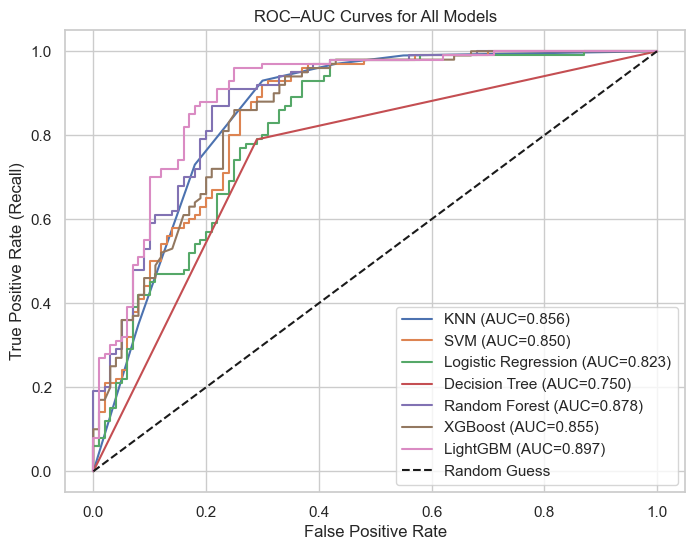

In [164]:
plt.figure(figsize=(8,6))

for name, (fpr, tpr, auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")

plt.plot([0,1], [0,1], 'k--', label="Random Guess")
plt.title("ROC–AUC Curves for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.legend()
plt.show()


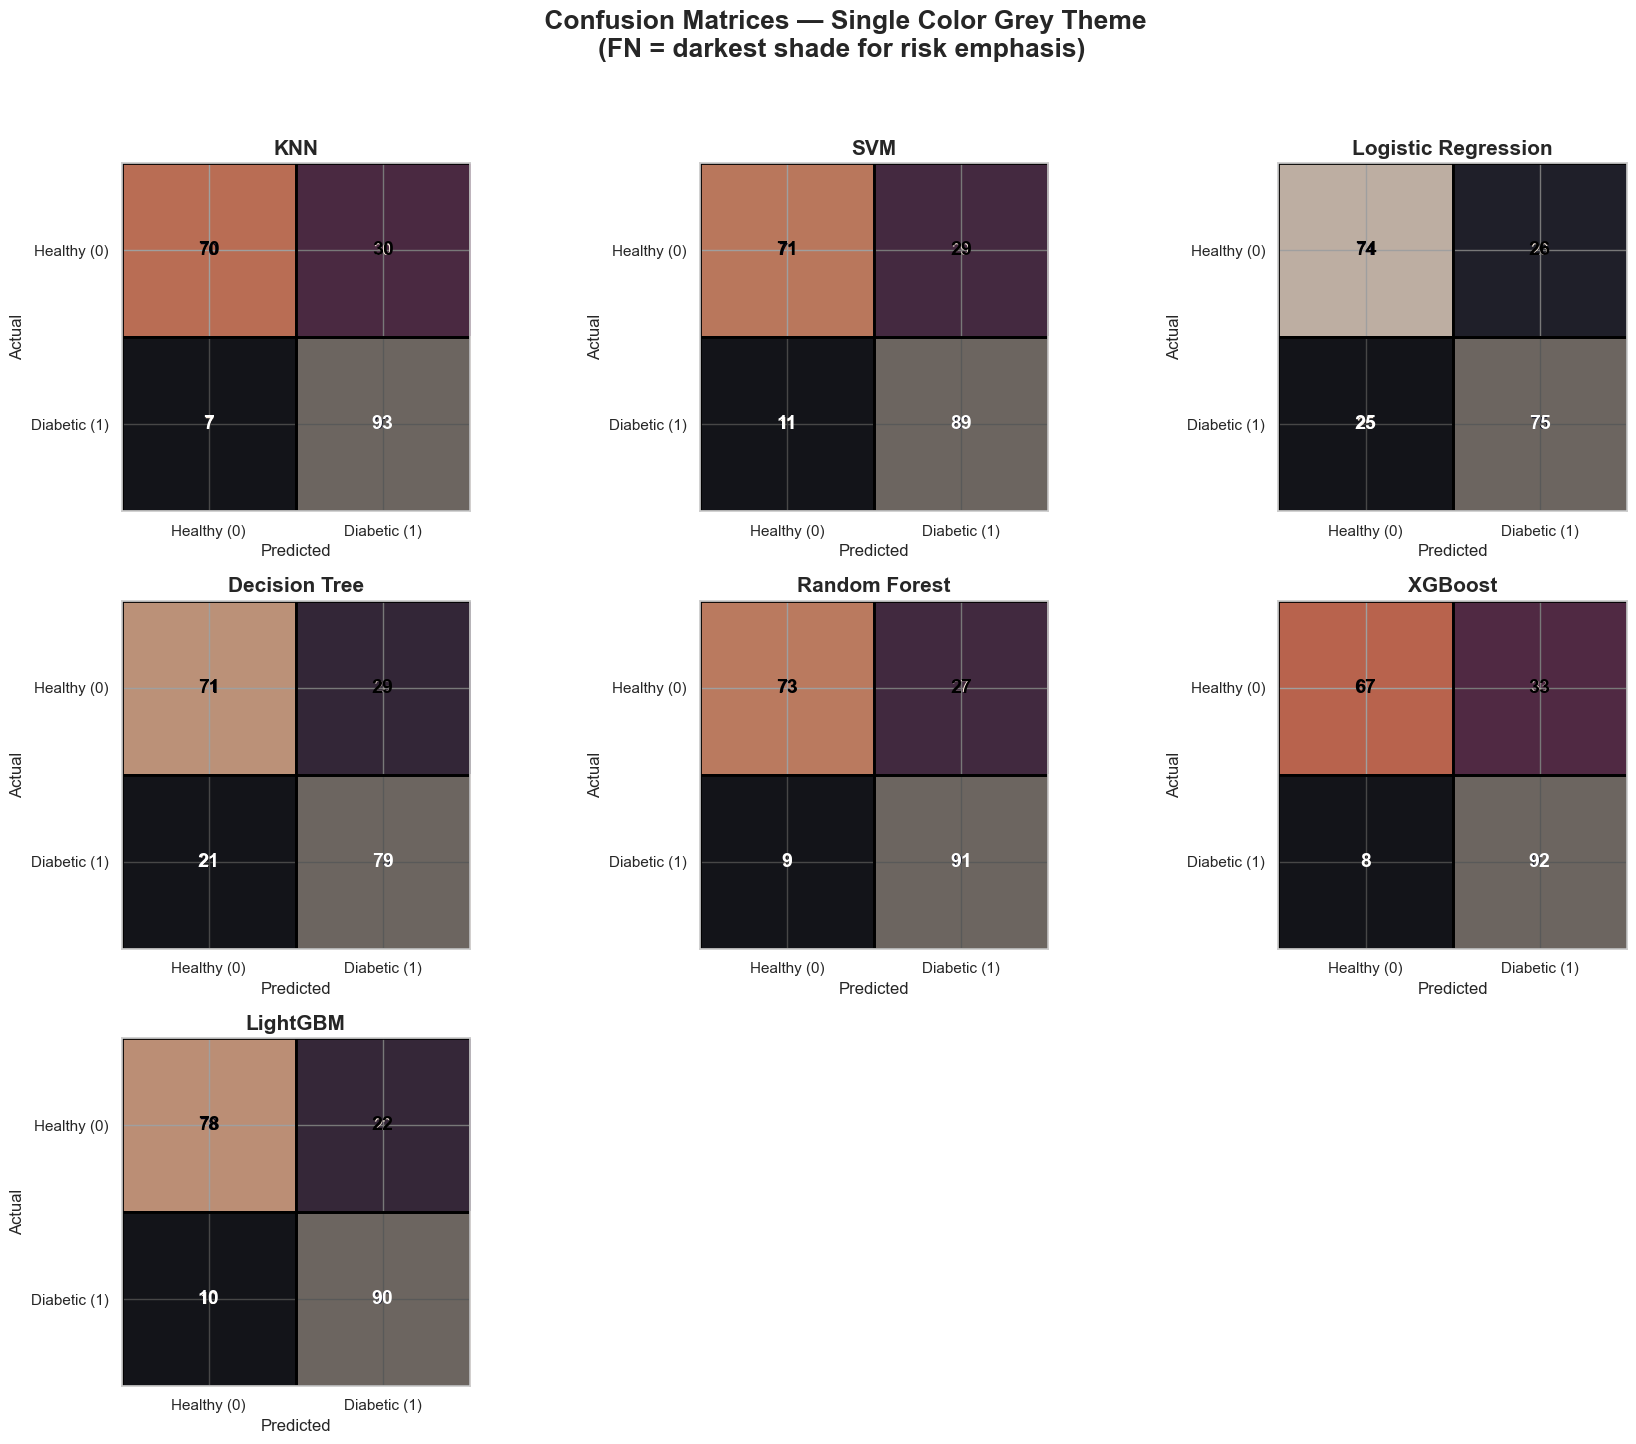

In [165]:

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np

model_names = list(final_models.keys())
rows, cols = 3, 3
fig, axes = plt.subplots(rows, cols, figsize=(18, 14))
axes = axes.ravel()

# Monochrome palette – One color only
TN = (0.30, 0.30, 0.30, 0.35)   # Light grey
FP = (0.20, 0.20, 0.20, 0.55)   # Medium grey
FN = (0.10, 0.10, 0.10, 0.75)   # Dark grey — FN stands out clearly
TP = (0.05, 0.05, 0.05, 0.60)   # Very dark grey

for i, name in enumerate(model_names):
    cm = cm_dict[name]
    disp = ConfusionMatrixDisplay(cm, display_labels=["Healthy (0)", "Diabetic (1)"])
    disp.plot(ax=axes[i], cmap=None, colorbar=False)

    # color grid layout (Actual vs Predicted)
    colors = [[TN, FP],
              [FN, TP]]  # bottom-left = FN = darkest shade

    for r in range(2):
        for c in range(2):
            rect = patches.Rectangle((c-0.5, r-0.5),1,1,
                                     edgecolor="black",
                                     linewidth=2,
                                     facecolor=colors[r][c])
            axes[i].add_patch(rect)

            # Text overlay
            axes[i].text(c, r, cm[r][c],
                         ha='center', va='center',
                         fontsize=14, fontweight='bold', color="white" if colors[r][c][0]<0.15 else "black")

    axes[i].set_title(name, fontsize=15, fontweight="bold")
    axes[i].set_xlabel("Predicted", fontsize=12)
    axes[i].set_ylabel("Actual", fontsize=12)

# Hide empty plots
for j in range(i+1, rows*cols):
    fig.delaxes(axes[j])

plt.suptitle(" Confusion Matrices — Single Color Grey Theme\n(FN = darkest shade for risk emphasis)",
             fontsize=19, fontweight="bold", y=1.03)
plt.tight_layout()
plt.show()
